In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("merged_data.csv")
df

,X,Y,Z,EDA,HR,TEMP
0,-13,-61,5,6.769995,99.43,31.17
1,-20,-69,-3,6.769995,99.43,31.17
2,-31,-78,-15,6.769995,99.43,31.17
3,-47,-65,-38,6.769995,99.43,31.17
4,-67,-57,-53,6.769995,99.43,31.17
...,...,...,...,...,...,...
1995,-15,57,27,5.896443,85.75,31.61
1996,-14,56,31,5.896443,85.75,31.61
1997,-11,56,30,5.896443,85.75,31.61
1998,-9,58,26,5.896443,85.75,31.61


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       2000 non-null   int64  
 1   Y       2000 non-null   int64  
 2   Z       2000 non-null   int64  
 3   EDA     2000 non-null   float64
 4   HR      2000 non-null   float64
 5   TEMP    2000 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 93.9 KB


In [4]:
display(df.describe())

,X,Y,Z,EDA,HR,TEMP
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-20.158500,45.437500,27.271000,5.985091,97.464880,31.426000
std,14.418263,25.268842,11.366405,0.374448,5.761018,0.122276
min,-101.000000,-102.000000,-53.000000,5.286080,85.750000,31.170000
25%,-24.000000,53.000000,26.000000,5.727287,92.880000,31.330000
50%,-17.000000,54.000000,27.000000,6.009215,99.430000,31.490000
75%,-10.000000,57.000000,30.000000,6.186059,102.370000,31.510000
max,33.000000,80.000000,104.000000,6.907114,104.700000,31.610000


In [5]:
df.isna().sum()

X       0
Y       0
Z       0
EDA     0
HR      0
TEMP    0
dtype: int64

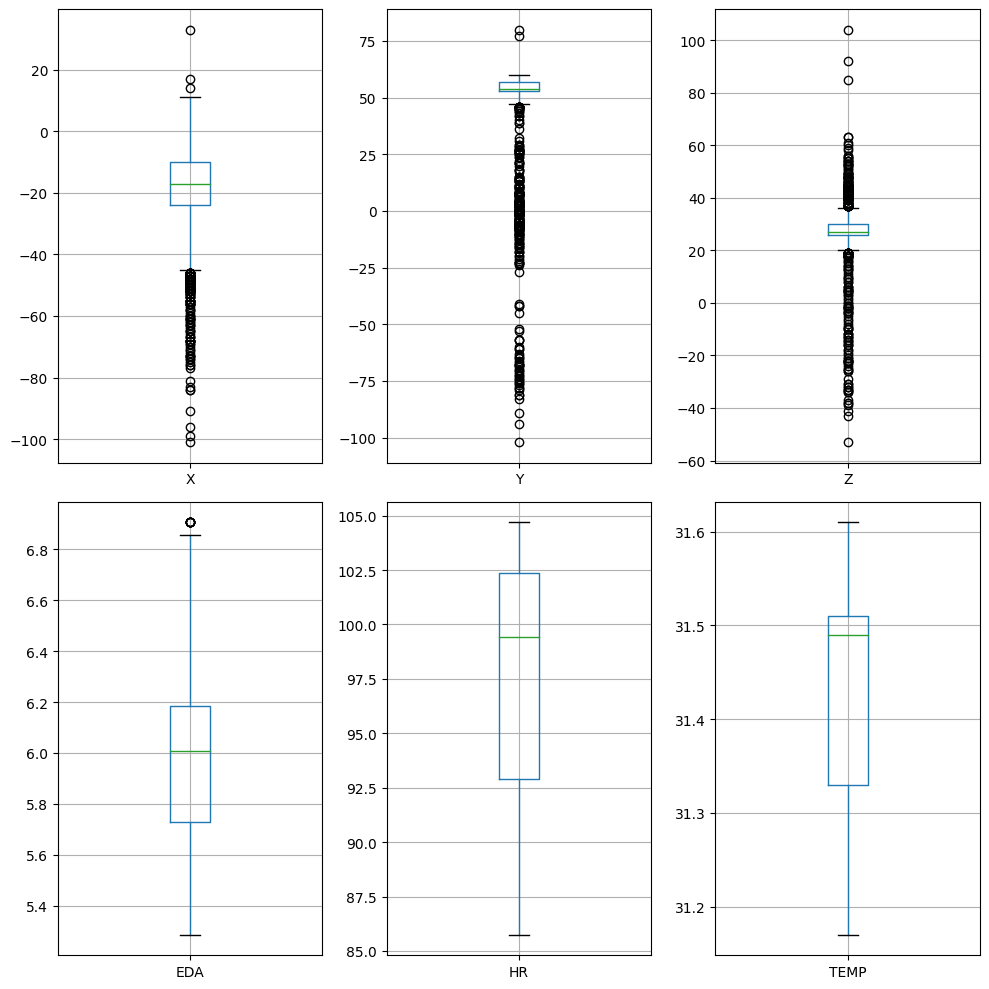

In [6]:
# Outlier Checking

list_columns = list(df.columns.values)

num_rows = 2
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10))

for i, column_name in enumerate(list_columns):
    df.boxplot(column_name, ax=ax.flatten()[i])
    

plt.tight_layout()
plt.show()

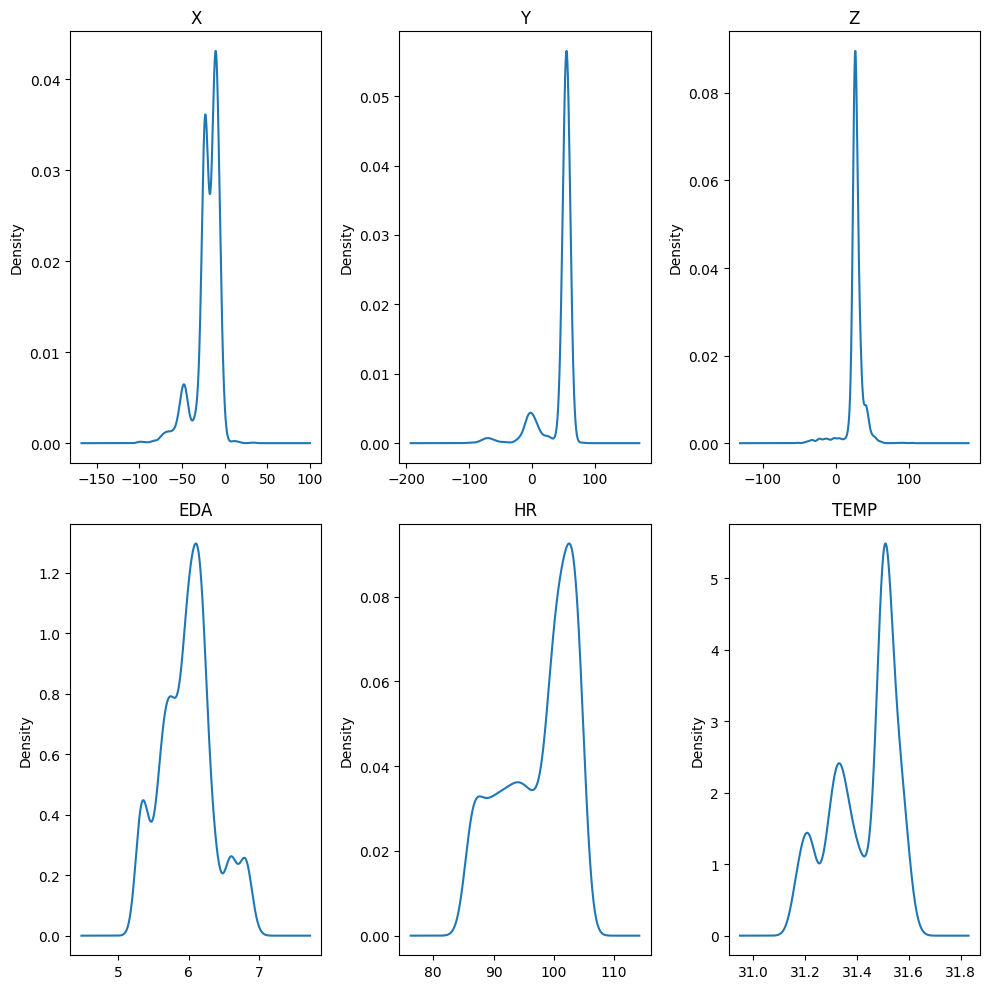

In [7]:
# Distribution of Data
 
list_columns = list(df.columns.values)

num_rows = 2
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10))

for i, column_name in enumerate(list_columns):
    df[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

# Data Pre-processing 

In [8]:
df.corr()

,X,Y,Z,EDA,HR,TEMP
X,1.000000,0.561115,0.065319,-0.555405,-0.358603,0.468596
Y,0.561115,1.000000,0.181914,-0.668719,-0.260813,0.668061
Z,0.065319,0.181914,1.000000,-0.117561,0.109051,-0.082451
EDA,-0.555405,-0.668719,-0.117561,1.000000,-0.158663,-0.189896
HR,-0.358603,-0.260813,0.109051,-0.158663,1.000000,-0.761921
TEMP,0.468596,0.668061,-0.082451,-0.189896,-0.761921,1.000000


In [9]:
from sklearn.preprocessing import QuantileTransformer

quantile_trans = QuantileTransformer(n_quantiles=df.shape[0], output_distribution='normal')
df_scaled = quantile_trans.fit_transform(df)

In [10]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,X,Y,Z,EDA,HR,TEMP
0,0.230879,-2.131882,-1.753363,1.687300,-0.009405,-5.199338
1,-0.136475,-2.307796,-1.873274,1.687300,-0.009405,-5.199338
2,-1.114342,-2.673620,-2.063981,1.687300,-0.009405,-5.199338
3,-1.420103,-2.190138,-2.840644,1.687300,-0.009405,-5.199338
4,-2.156874,-2.096724,-5.199338,1.687300,-0.009405,-5.199338
...,...,...,...,...,...,...
1995,0.116882,0.765923,-0.052690,-0.322104,-5.199338,5.199338
1996,0.163741,0.447759,0.752541,-0.322104,-5.199338,5.199338
1997,0.571318,0.447759,0.592857,-0.322104,-5.199338,5.199338
1998,0.950869,1.418386,-0.489748,-0.322104,-5.199338,5.199338


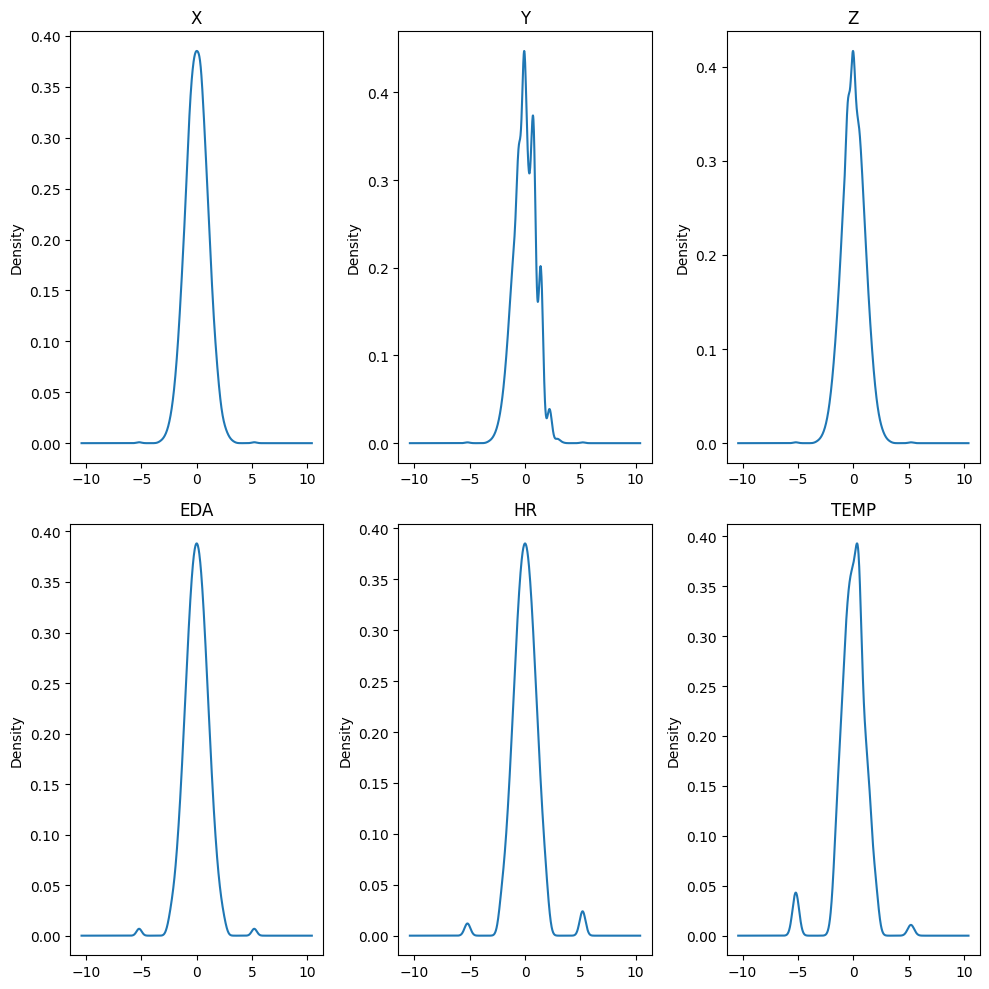

In [11]:
list_columns = list(df_scaled.columns.values)

num_rows = 2
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10))

for i, column_name in enumerate(list_columns):
    df_scaled[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

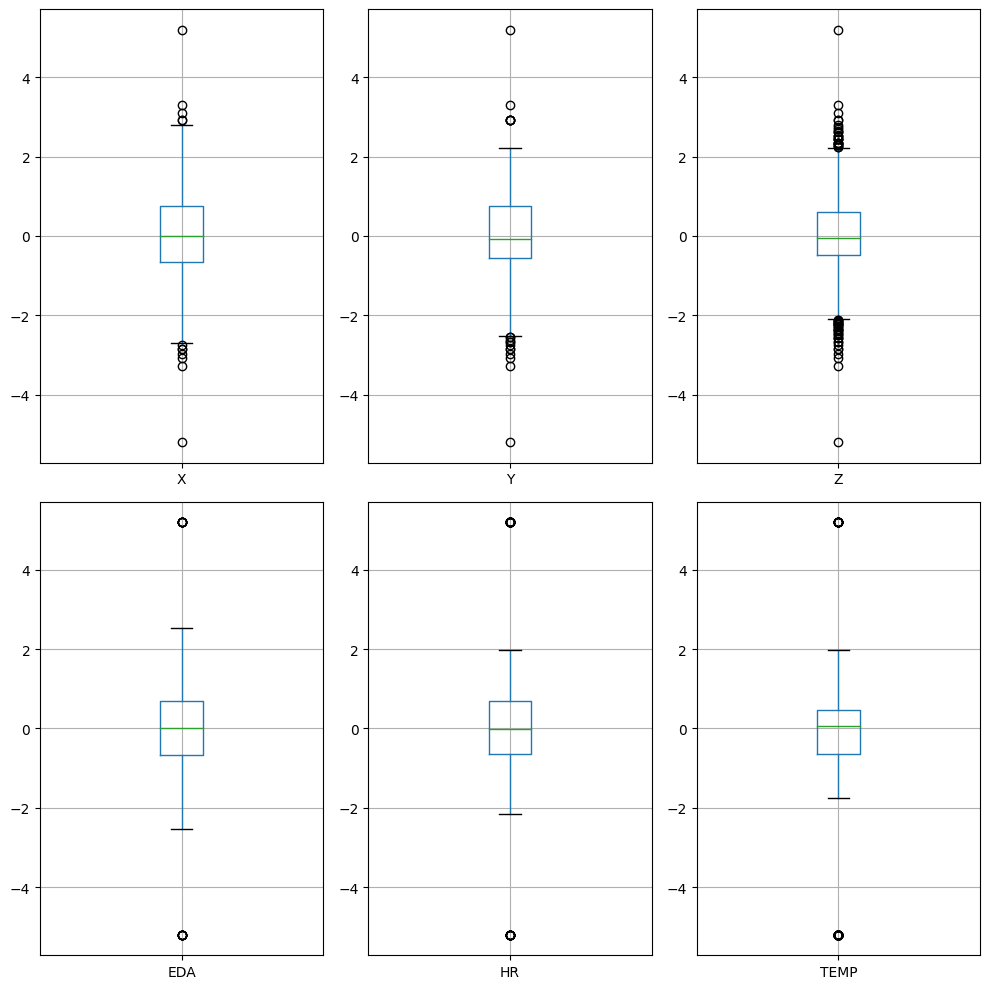

In [12]:
list_columns = list(df_scaled.columns.values)

num_rows = 2
num_cols = 3

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, column_name in enumerate(list_columns):
    df_scaled.boxplot(column_name, ax=ax.flatten()[i])

plt.tight_layout()
plt.show()

In [13]:
# Outlier Persentation

for i, j in df_scaled.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    inter_q = q3 - q1

    j_col = j[(j <= q1 - 1.5 * inter_q) | (j >= q3 + 1.5 * inter_q)]
    percent = np.shape(j_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f" %(i, percent))

Column X outliers = 0.60
Column Y outliers = 0.95
Column Z outliers = 3.10
Column EDA outliers = 0.80
Column HR outliers = 2.40
Column TEMP outliers = 4.00


In [14]:
Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)
IQR = Q3 - Q1

new_df_filtered = df_scaled[~((df_scaled < (Q1 - 1.5 * IQR)) | (df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
print(new_df_filtered)

             X         Y         Z       EDA        HR      TEMP
32   -0.985941 -2.023501 -1.656855  2.526951  0.030099 -1.462619
35    2.226018 -1.977156 -1.733305  2.526951  0.030099 -1.462619
44   -1.159818 -2.211323 -1.711204  2.335645  0.030099 -1.462619
45   -0.930377 -2.131882 -1.513845  2.335645  0.030099 -1.462619
46    0.116882 -2.053542  0.985941  2.335645  0.030099 -1.462619
...        ...       ...       ...       ...       ...       ...
1979  0.749216  0.765923 -0.052690 -0.279462 -2.150499  1.986088
1980  0.749216  1.418386 -0.489748 -0.279462 -2.150499  1.986088
1981  0.571318  0.765923 -0.489748 -0.279462 -2.150499  1.986088
1982  0.749216  0.765923 -0.489748 -0.279462 -2.150499  1.986088
1983  0.571318  1.418386 -0.489748 -0.279462 -2.150499  1.986088

[1808 rows x 6 columns]


In [15]:
new_df_filtered = pd.DataFrame(new_df_filtered, columns=df_scaled.columns)

new_df_filtered

,X,Y,Z,EDA,HR,TEMP
32,-0.985941,-2.023501,-1.656855,2.526951,0.030099,-1.462619
35,2.226018,-1.977156,-1.733305,2.526951,0.030099,-1.462619
44,-1.159818,-2.211323,-1.711204,2.335645,0.030099,-1.462619
45,-0.930377,-2.131882,-1.513845,2.335645,0.030099,-1.462619
46,0.116882,-2.053542,0.985941,2.335645,0.030099,-1.462619
...,...,...,...,...,...,...
1979,0.749216,0.765923,-0.052690,-0.279462,-2.150499,1.986088
1980,0.749216,1.418386,-0.489748,-0.279462,-2.150499,1.986088
1981,0.571318,0.765923,-0.489748,-0.279462,-2.150499,1.986088
1982,0.749216,0.765923,-0.489748,-0.279462,-2.150499,1.986088


# PEMODELAN

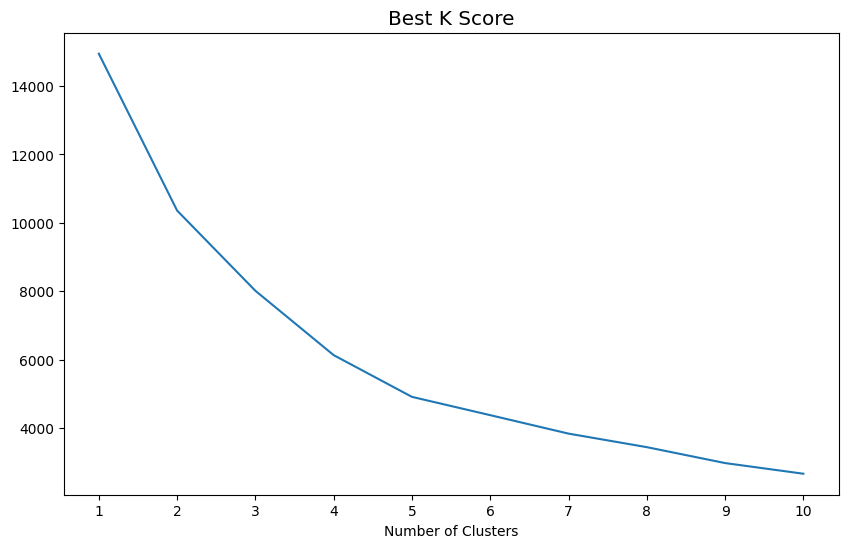

In [16]:
from sklearn.cluster import KMeans

score = []
k_value = range(1, 11)

for k in k_value:
    kmeans = KMeans(n_clusters= k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    cluster = kmeans.fit_predict(df_scaled)
    score.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(k_value, score)
plt.xlabel('Number of Clusters')
plt.xticks(k_value)
plt.style.use('ggplot')
plt.title('Best K Score')
plt.show()

 For k = 2, the silhouette score is: [0.3143699962299952]
 For k = 3, the silhouette score is: [0.35222966715491727]
 For k = 4, the silhouette score is: [0.3856449458587081]
 For k = 5, the silhouette score is: [0.4180136871524921]
 For k = 6, the silhouette score is: [0.4299752745858385]
 For k = 7, the silhouette score is: [0.4311335201470679]
 For k = 8, the silhouette score is: [0.4139393350814381]


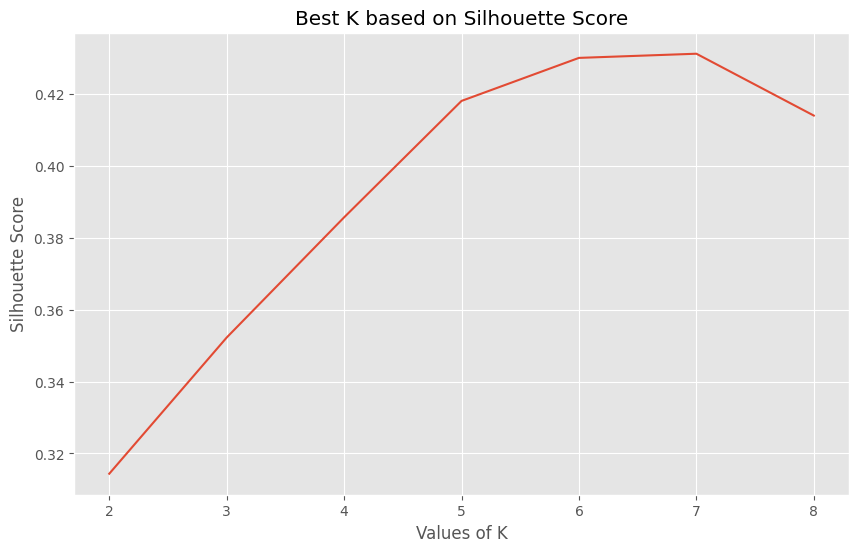

In [17]:
# Calculate Silhouette Score (Outlier dihapus)

from sklearn.metrics import silhouette_score

k_value = [2, 3, 4, 5, 6, 7, 8]
scores = {}

for k in k_value:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    scores[k] = [silhouette_avg]

for k, value in scores.items():
    print(" For k = {}, the silhouette score is: {}".format(k, value))

key = list(scores.keys())
value = list(scores.values())

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(key, value)
plt.xlabel('Values of K')
plt.xticks(k_value)
plt.ylabel('Silhouette Score')
plt.style.use('ggplot')
plt.title('Best K based on Silhouette Score')
plt.show()

In [18]:
from sklearn.metrics import davies_bouldin_score

k_value = [2, 3, 4, 5, 6, 7, 8]
scores = {}

for k in k_value:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.predict(df_scaled)

    db_score = davies_bouldin_score(df_scaled, cluster_labels)
    scores[k] = [db_score]

for k, value in scores.items():
    print(" For k = {}, the davies-bouldin score is: {}".format(k, value))

 For k = 2, the davies-bouldin score is: [1.0861957917326086]
 For k = 3, the davies-bouldin score is: [1.1787635761853272]
 For k = 4, the davies-bouldin score is: [1.056828491483694]
 For k = 5, the davies-bouldin score is: [0.8748400158236033]
 For k = 6, the davies-bouldin score is: [0.7739201918835342]
 For k = 7, the davies-bouldin score is: [0.8877314827721656]
 For k = 8, the davies-bouldin score is: [0.8788773601800843]


In [19]:
kmeans = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=10000, random_state=42)
kmeans.fit(df_scaled)
df_scaled['cluster'] = kmeans.labels_

df_scaled

,X,Y,Z,EDA,HR,TEMP,cluster
0,0.230879,-2.131882,-1.753363,1.687300,-0.009405,-5.199338,4
1,-0.136475,-2.307796,-1.873274,1.687300,-0.009405,-5.199338,4
2,-1.114342,-2.673620,-2.063981,1.687300,-0.009405,-5.199338,4
3,-1.420103,-2.190138,-2.840644,1.687300,-0.009405,-5.199338,4
4,-2.156874,-2.096724,-5.199338,1.687300,-0.009405,-5.199338,4
...,...,...,...,...,...,...,...
1995,0.116882,0.765923,-0.052690,-0.322104,-5.199338,5.199338,5
1996,0.163741,0.447759,0.752541,-0.322104,-5.199338,5.199338,5
1997,0.571318,0.447759,0.592857,-0.322104,-5.199338,5.199338,5
1998,0.950869,1.418386,-0.489748,-0.322104,-5.199338,5.199338,5


<Figure size 800x800 with 0 Axes>

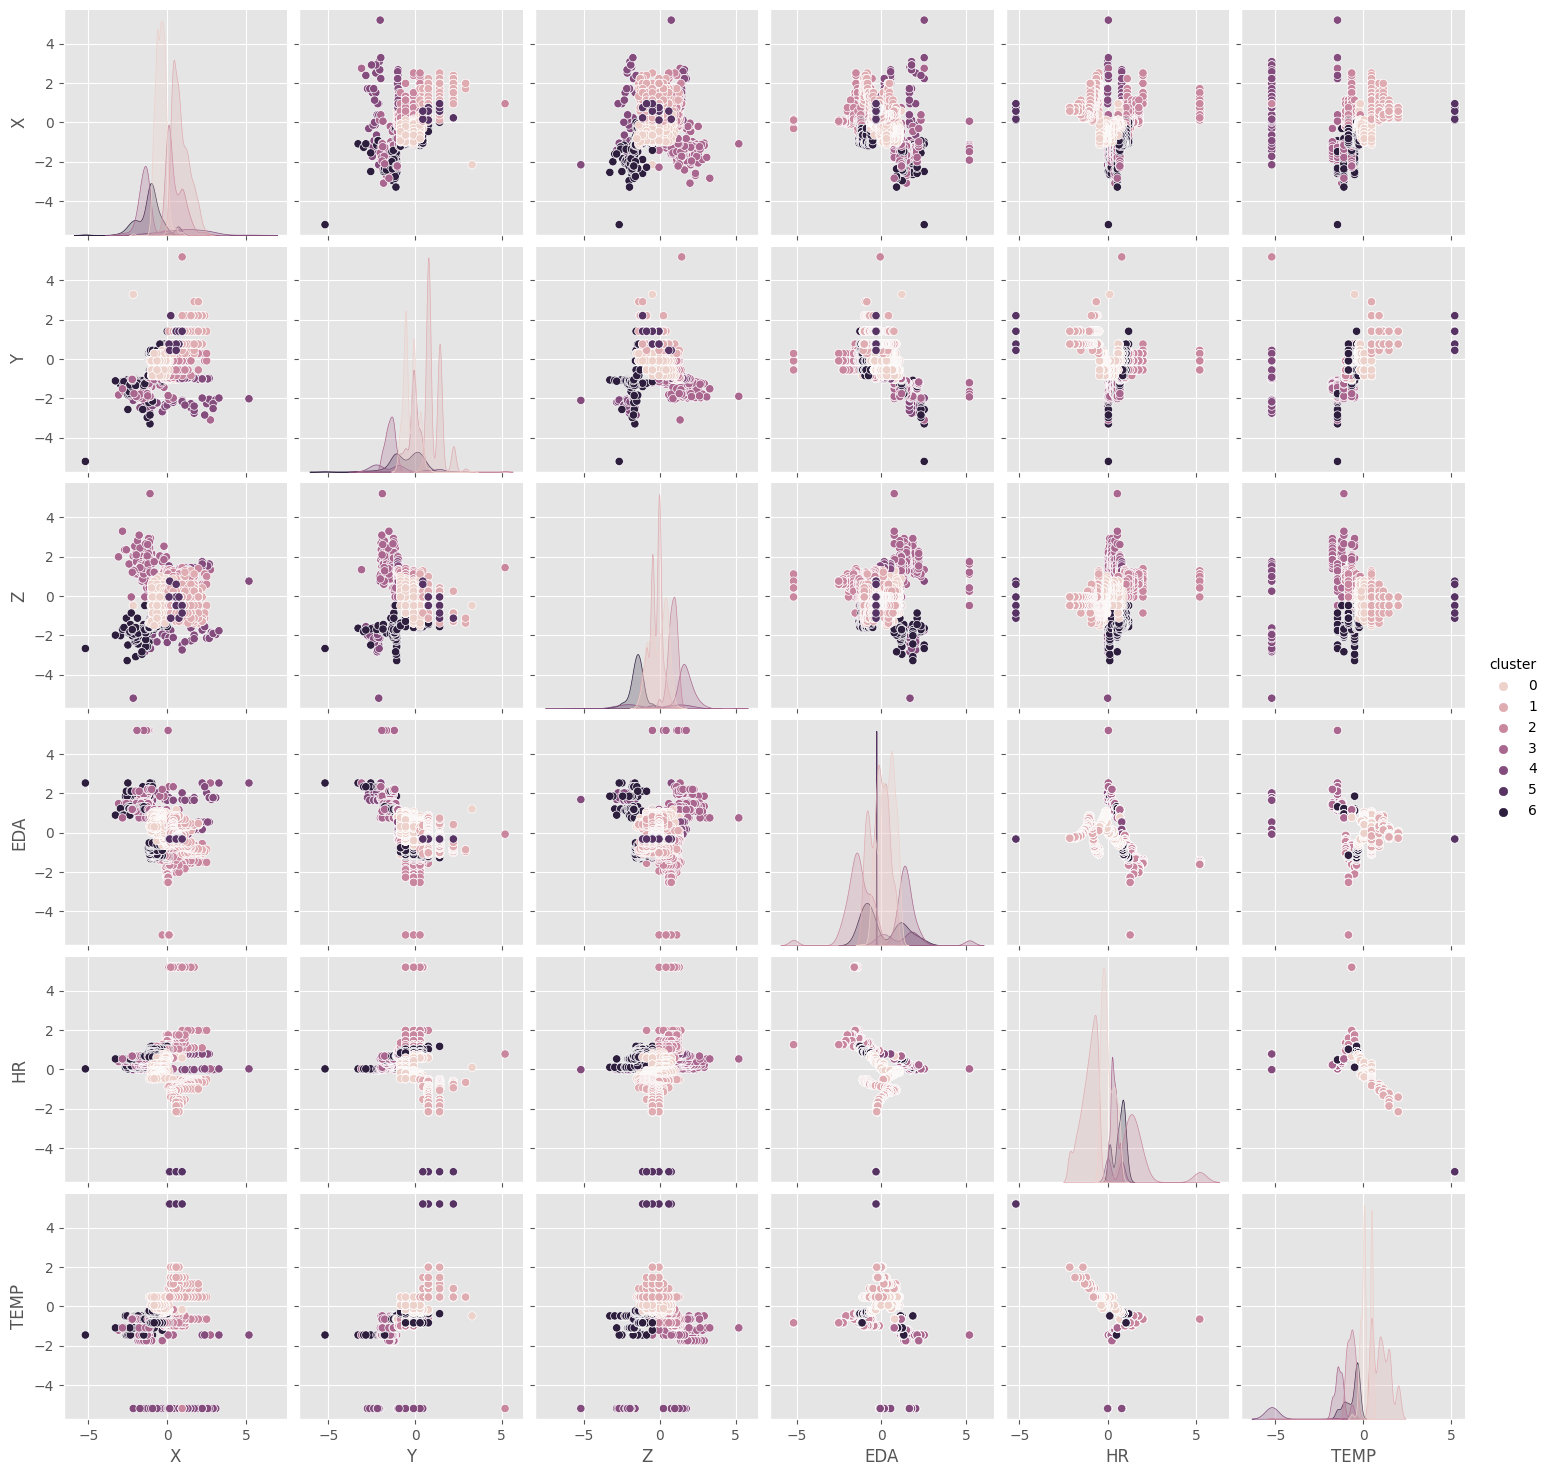

In [20]:
import seaborn as sns 

plt.figure(figsize=(8,8))
sns.pairplot(data=df_scaled, hue='cluster')

In [21]:
df_pca = df_scaled.loc[:, ~df_scaled.columns.isin(['cluster'])]
df_pca

,X,Y,Z,EDA,HR,TEMP
0,0.230879,-2.131882,-1.753363,1.687300,-0.009405,-5.199338
1,-0.136475,-2.307796,-1.873274,1.687300,-0.009405,-5.199338
2,-1.114342,-2.673620,-2.063981,1.687300,-0.009405,-5.199338
3,-1.420103,-2.190138,-2.840644,1.687300,-0.009405,-5.199338
4,-2.156874,-2.096724,-5.199338,1.687300,-0.009405,-5.199338
...,...,...,...,...,...,...
1995,0.116882,0.765923,-0.052690,-0.322104,-5.199338,5.199338
1996,0.163741,0.447759,0.752541,-0.322104,-5.199338,5.199338
1997,0.571318,0.447759,0.592857,-0.322104,-5.199338,5.199338
1998,0.950869,1.418386,-0.489748,-0.322104,-5.199338,5.199338


In [22]:
df_scaled

,X,Y,Z,EDA,HR,TEMP,cluster
0,0.230879,-2.131882,-1.753363,1.687300,-0.009405,-5.199338,4
1,-0.136475,-2.307796,-1.873274,1.687300,-0.009405,-5.199338,4
2,-1.114342,-2.673620,-2.063981,1.687300,-0.009405,-5.199338,4
3,-1.420103,-2.190138,-2.840644,1.687300,-0.009405,-5.199338,4
4,-2.156874,-2.096724,-5.199338,1.687300,-0.009405,-5.199338,4
...,...,...,...,...,...,...,...
1995,0.116882,0.765923,-0.052690,-0.322104,-5.199338,5.199338,5
1996,0.163741,0.447759,0.752541,-0.322104,-5.199338,5.199338,5
1997,0.571318,0.447759,0.592857,-0.322104,-5.199338,5.199338,5
1998,0.950869,1.418386,-0.489748,-0.322104,-5.199338,5.199338,5


In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_pca)

df_pca

array([[-4.13841847,  1.46493038],
       [-4.29194376,  1.68479565],
       [-4.67949059,  2.22305285],
       ...,
       [ 6.26764619,  2.40002081],
       [ 7.02498161,  2.15266839],
       [ 7.10052579,  2.21188412]])

In [24]:
df_pca = pd.DataFrame(df_pca, columns=['PC 1', 'PC2'])
df_pca['cluster'] = df_scaled.loc[:, df_scaled.columns.isin(['cluster'])]

df_pca

,PC 1,PC2,cluster
0,-4.138418,1.464930,4
1,-4.291944,1.684796,4
2,-4.679491,2.223053,4
3,-4.386105,2.345341,4
4,-4.070266,2.998354,4
...,...,...,...
1995,6.420376,2.608145,5
1996,6.128041,2.546944,5
1997,6.267646,2.400021,5
1998,7.024982,2.152668,5


<Figure size 800x800 with 0 Axes>

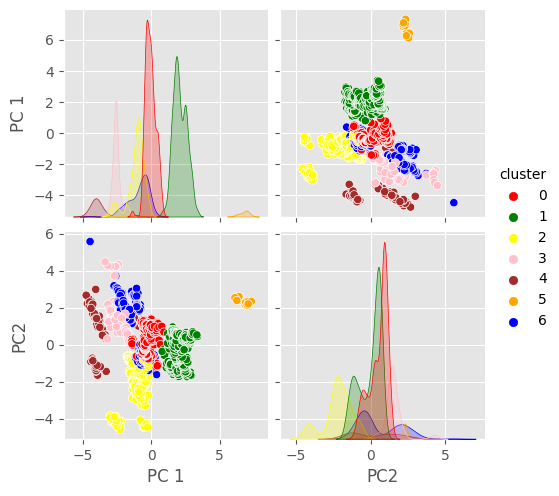

In [25]:
import seaborn as sns 

plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca, hue='cluster', palette=['red', 'green', 'yellow', 'pink', 'brown', 'orange', 'blue'])